Establish parameters

https://github.com/mapado/haversine

In [1]:
import geopandas as gpd
import pandas as pd
# from haversine import haversine, Unit
import numpy as np
import matplotlib.pyplot as plt
# import os
# pd.options.mode.chained_assignment = None  # default='warn'
# from ray import train, tune

In [2]:
fn_states = '/Volumes/Extreme SSD/largest_plots/raw_data/cb_2021_us_all_5m/cb_2021_us_state_5m.zip'
States = gpd.read_file(fn_states)

<Axes: >

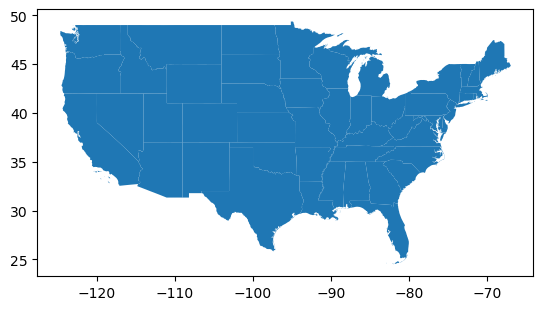

In [3]:
exclusion_list = ['Puerto Rico', 'Hawaii', 'Alaska', 'American Samoa', 'Guam', 'Commonwealth of the Northern Mariana Islands', 'United States Virgin Islands']
Contig48 = States[~States['NAME'].isin(exclusion_list)]
Contig48.plot()

In [4]:
my_values = Contig48.total_bounds
my_keys = ['minx', 'miny', 'maxx', 'maxy']
bound_dict = {key:value for (key, value) in zip(my_keys, my_values)}
bound_dict

{'minx': -124.733174, 'miny': 24.514962, 'maxx': -66.949895, 'maxy': 49.384358}

## Figure out grid size
https://stackoverflow.com/questions/7477003/calculating-new-longitude-latitude-from-old-n-meters

In [5]:
r_earth = 6378  # km
latitude = 1
dy = 100 # km

new_latitude  = latitude  + (dy / r_earth) * (180 / np.pi)
np.abs(latitude - new_latitude)

0.8983345800106981

In [6]:
r_earth = 6378  # km
longitude = 1
latitude = bound_dict['miny']
dx = 100 # km

new_longitude = longitude + (dx / r_earth) * (180 / np.pi) / np.cos(latitude * np.pi/180)
np.abs(new_longitude - longitude)

0.9873404065365261

In [7]:
r_earth = 6378  # km
longitude = 1
latitude = bound_dict['maxy']
dx = 100 # km

new_longitude = longitude + (dx / r_earth) * (180 / np.pi) / np.cos(latitude * np.pi/180)
np.abs(new_longitude - longitude)

1.3799694940171783

- 100 km east-west is between 0.98 and 1.4 decimal degrees longitude. 
- 100 km n-s is 0.89 decimal degrees latitude.

In [8]:
xx = np.arange(start=bound_dict['minx'], stop=bound_dict['maxx'], step=1)
yy = np.arange(start=bound_dict['miny'], stop=bound_dict['maxy'], step=1)

In [9]:
?plt.subplots

Signature:
plt.subplots(
    nrows: 'int' = 1,
    ncols: 'int' = 1,
    *,
    sharex: "bool | Literal['none', 'all', 'row', 'col']" = False,
    sharey: "bool | Literal['none', 'all', 'row', 'col']" = False,
    squeeze: 'bool' = True,
    width_ratios: 'Sequence[float] | None' = None,
    height_ratios: 'Sequence[float] | None' = None,
    subplot_kw: 'dict[str, Any] | None' = None,
    gridspec_kw: 'dict[str, Any] | None' = None,
    **fig_kw,
) -> 'tuple[Figure, Any]'
Docstring:
Create a figure and a set of subplots.

This utility wrapper makes it convenient to create common layouts of
subplots, including the enclosing figure object, in a single call.

Parameters
----------
nrows, ncols : int, default: 1
    Number of rows/columns of the subplot grid.

sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
    Controls sharing of properties among x (*sharex*) or y (*sharey*)
    axes:

    - True or 'all': x- or y-axis will be shared among all subplots.
    - False

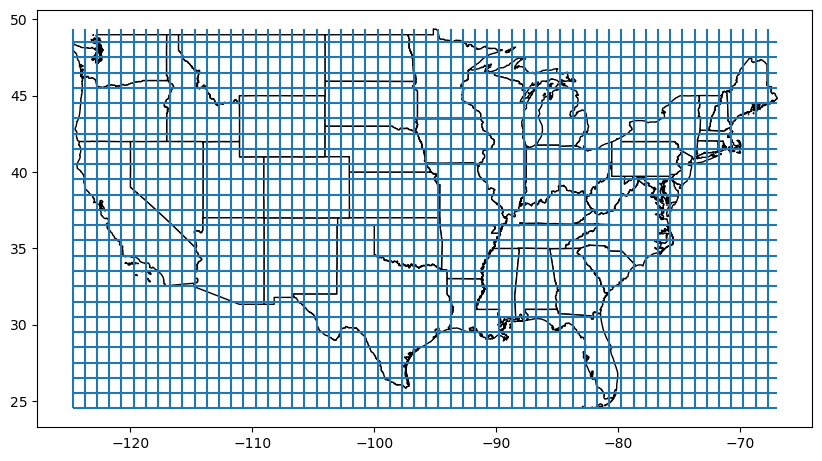

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
Contig48.plot(ax=ax, color='white', edgecolor='black')
plt.vlines(x=xx, ymin=bound_dict['miny'], ymax=bound_dict['maxy'])
plt.hlines(y=yy, xmin=bound_dict['minx'], xmax=bound_dict['maxx'])

# ax.vlines(x=xx, ymin=0, ymax=100, colors='purple', ls='--', lw=2, label='vline_multiple - full height')
# fig.show()